# Introduction
In Part I, you collected the data necessary for the project. 

In this Part, you'll start data analysis proper! More specifically, you will:
- explore the dataset
- generate metrics from the texts
- compare the metrics
- tell data stories

The kinds of metrics we're using are exciting, ranging from simple ones such as length and number of sentences, to more complex measures such as readability. 

Useful readings on visualization: 
<a href = "https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed">Introduction to Data Visualization in Python</a> (run it in Incognito Mode if you face the paywall)

It's quite comprehensive and a useful guide for this Part if you're new to visualization.

### Step 1: Import (and install) libraries
Let's start with importing the libraries that we need:
- pandas as pd
- matplotlib.pyplot
- string

You <em>might</em> need to install the following libraries if you've never done so:
- wordcloud
- vaderSentiment
- sent_tokenize, word_tokenize from nltk
- textstat

In [1]:
# Step 1: Import libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import string 
import nltk
from wordcloud import WordCloud
import vaderSentiment
import textstat
from nltk import  sent_tokenize, word_tokenize

### Step 2: Read CSV from Part I
Let's read the CSV that we have obtained from Part I. Your DataFrame should look something like this:

![PartIDataFrame](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/PartIDataFrame.png)

In [ ]:
# Step 2: Read your Part I CSV into a DataFrame

In [36]:
df=pd.read_csv('cleaned_harry_potter.csv') 

In [37]:
df

,name,full_text
0,Harry Potter and the Sorcerer's Stone,Harry Potter and the Sorcerer's Stone CHAPTER ...
1,Harry Potter and The Chamber of Secrets,J . K . R O W L ! N G HARRY POTTER /...
2,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban by ...
3,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire By J.K. ...
4,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix J K ...
5,Harry Potter and The Half-Blood Prince,Harry Potter and The Half-Blood Prince Chapte...
6,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows By J. K....


## Generating metrics
In this section, we'll start creating some metrics that we can use for visualization and comparison later. 

### Step 3: Get the character length of the texts
How many characters are there in each text? Create a column named "char_length" that contains it.

![CharLengthColumn](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/CharLengthColumn.png)

This can be done using the <font color="green">len</font> function. Hopefully the numbers are similar to ours, but don't worry if you're off by 1%. 

In [ ]:
# Step 3: Create 'char_length' column

In [38]:
df['char_length']= df['full_text'].apply(len)

In [39]:
df

,name,full_text,char_length
0,Harry Potter and the Sorcerer's Stone,Harry Potter and the Sorcerer's Stone CHAPTER ...,437562
1,Harry Potter and The Chamber of Secrets,J . K . R O W L ! N G HARRY POTTER /...,507952
2,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban by ...,615711
3,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire By J.K. ...,1113443
4,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix J K ...,1524926
5,Harry Potter and The Half-Blood Prince,Harry Potter and The Half-Blood Prince Chapte...,991870
6,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows By J. K....,1161885


### Step 4: Get the number of words in the text
Let's calculate the number of words in the text. To do this, we can use the word_tokenize function from nltk. 

word_tokenize turns a string into a list containing individual words, which makes it perfect for the job. 

You can then use len on that list of individual words to get the number of words in each text.

![WordLengthColumn](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/WordLengthColumn.png)

In [ ]:
# Step 4: Create "word_length" column

In [40]:
from nltk.tokenize import word_tokenize

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [41]:
df['word_length']= df['full_text'].apply(word_tokenize).apply(len)

In [42]:
df

,name,full_text,char_length,word_length
0,Harry Potter and the Sorcerer's Stone,Harry Potter and the Sorcerer's Stone CHAPTER ...,437562,99030
1,Harry Potter and The Chamber of Secrets,J . K . R O W L ! N G HARRY POTTER /...,507952,112008
2,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban by ...,615711,135029
3,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire By J.K. ...,1113443,243895
4,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix J K ...,1524926,322422
5,Harry Potter and The Half-Blood Prince,Harry Potter and The Half-Blood Prince Chapte...,991870,217802
6,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows By J. K....,1161885,253196


### Step 5: Get the number of sentences in the text
Now that we've done the number of characters and words, next we will calculate the sentence length.

Create a column called "sentence_length", containing the number of sentences in a particular text.

nltk's sent_tokenize is perfect for the job, turning a string into a list containing sentences. 

Get the length of the list - that is the number of sentences in the text.

![SentenceLengthColumn](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/SentenceLengthColumn.png)

In [ ]:
# Step 5: Create 'sentence_length' column

In [43]:
df['sentence_length']= df['full_text'].apply(sent_tokenize).apply(len)

In [44]:
df

,name,full_text,char_length,word_length,sentence_length
0,Harry Potter and the Sorcerer's Stone,Harry Potter and the Sorcerer's Stone CHAPTER ...,437562,99030,6394
1,Harry Potter and The Chamber of Secrets,J . K . R O W L ! N G HARRY POTTER /...,507952,112008,5446
2,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban by ...,615711,135029,8582
3,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire By J.K. ...,1113443,243895,17521
4,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix J K ...,1524926,322422,22688
5,Harry Potter and The Half-Blood Prince,Harry Potter and The Half-Blood Prince Chapte...,991870,217802,13733
6,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows By J. K....,1161885,253196,13166


### Step 6: Plot "char_length" with a barplot
Let's see how long each book is, in terms of letters/string characters. 

Plot a barplot illustrating the number of string characters in each book.

When plotting the barplot, consider using a list containing numbers 1 to 7 as your x-axis. 

<details>
    <summary><strong>Click once to see our plot</strong></summary>
    <img src = "https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/CharLengthBarplot.png">
</details>

In [ ]:
# Step 6: Plot "char_length" with barplot

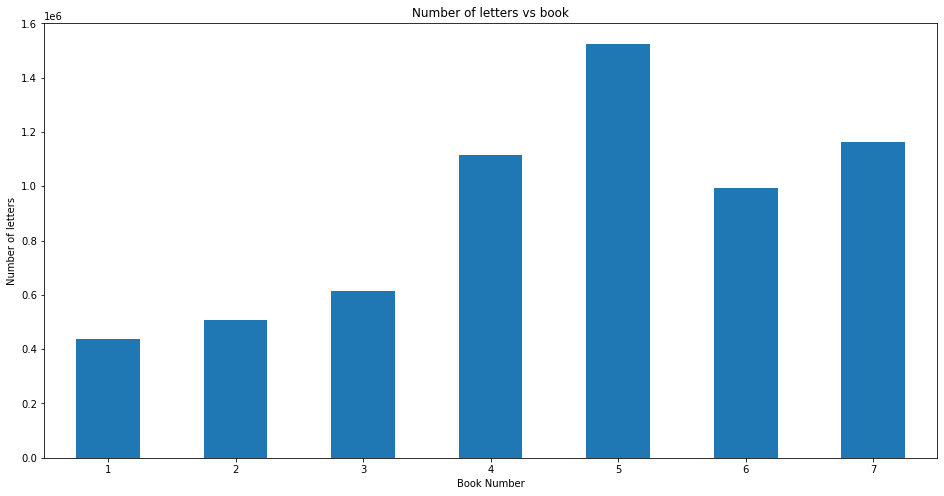

In [54]:
plt.figure(figsize=(16, 8))
ax = df['char_length'].plot(kind='bar' ,rot=0)
ax.set_title('Number of letters vs book')
ax.set_xlabel('Book Number')
ax.set_ylabel('Number of letters')
ax.set_xticklabels(x_labels)
plt.show()

### Step 7: Plot 'word_length' with barplot
Similarly, let's see if the pattern is the same with word_length. 

Plot a barplot with word_length.

In [ ]:
# Step 7: Plot "word_length" with barplot

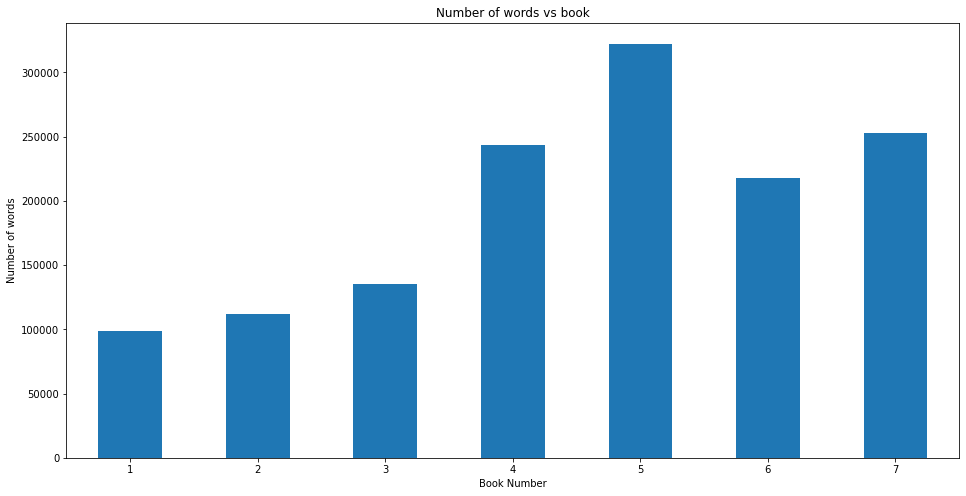

In [56]:
plt.figure(figsize=(16, 8))
ax = df['word_length'].plot(kind='bar' ,rot=0)
ax.set_title('Number of words vs book')
ax.set_xlabel('Book Number')
ax.set_ylabel('Number of words')
ax.set_xticklabels(x_labels)
plt.show()

<details>
    <summary><strong>Click once to see our plot</strong></summary>
    <img src = "https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/WordLengthBarplot.png">
</details>

### Step 8: Plot sentence_length with a barplot
Wow ok the pattern between char_length and word_length is identical. Let's see if we observe the same thing as well with sentence_length. 

Plot sentence_length as a barplot.

In [ ]:
# Step 8: Plot "sentence_length" with barplot

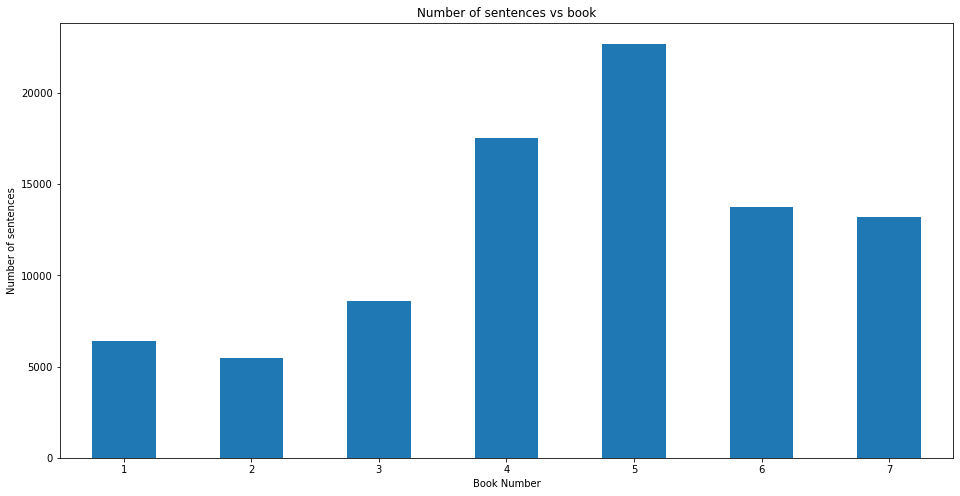

In [58]:
plt.figure(figsize=(16, 8))
ax = df['sentence_length'].plot(kind='bar' ,rot=0)
ax.set_title('Number of sentences vs book')
ax.set_xlabel('Book Number')
ax.set_ylabel('Number of sentences')
ax.set_xticklabels(x_labels)
plt.show()

<details>
    <summary><strong>Click once to see our plot</strong></summary>
    <img src = "https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/SentenceLengthBarplot.png">
</details>
<br>
<details>
    <summary><strong>What do you observe about the series with respect to char, word, and sentence length? Click once to see what we think</strong></summary>
    <ul>
        <li>char_length and word_length barplots are similar</li>
        <li>char_length/word_length barplots are different from sentence_length</li>
    </ul>
</details>

### Step 9: Create 'word_per_sentence' column
Measuring and plotting absolute numbers are but one part of the story. 

We will continue our analysis by creating a new column called word_per_sentence, where 

$word\_per\_sentence = word\_length \div sentence\_length$

In [ ]:
# Step 9: Create "word_per_sentence" column

In [62]:
df['word_per_sentence']=df['word_length']/df['sentence_length']

In [63]:
df

,name,full_text,char_length,word_length,sentence_length,word_per_sentence
0,Harry Potter and the Sorcerer's Stone,Harry Potter and the Sorcerer's Stone CHAPTER ...,437562,99030,6394,15.487957
1,Harry Potter and The Chamber of Secrets,J . K . R O W L ! N G HARRY POTTER /...,507952,112008,5446,20.567022
2,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban by ...,615711,135029,8582,15.733978
3,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire By J.K. ...,1113443,243895,17521,13.920153
4,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix J K ...,1524926,322422,22688,14.211125
5,Harry Potter and The Half-Blood Prince,Harry Potter and The Half-Blood Prince Chapte...,991870,217802,13733,15.859754
6,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows By J. K....,1161885,253196,13166,19.231050


### Step 10: Plot word_per_sentence with a barplot
Next, let's plot the word_per_sentence with a barplot as well.

This is a good plot since it gives a more balanced perspective on the metrics that we have observed so far. 

In [ ]:
# Step 10: Plot "word_per_sentence" with barplot

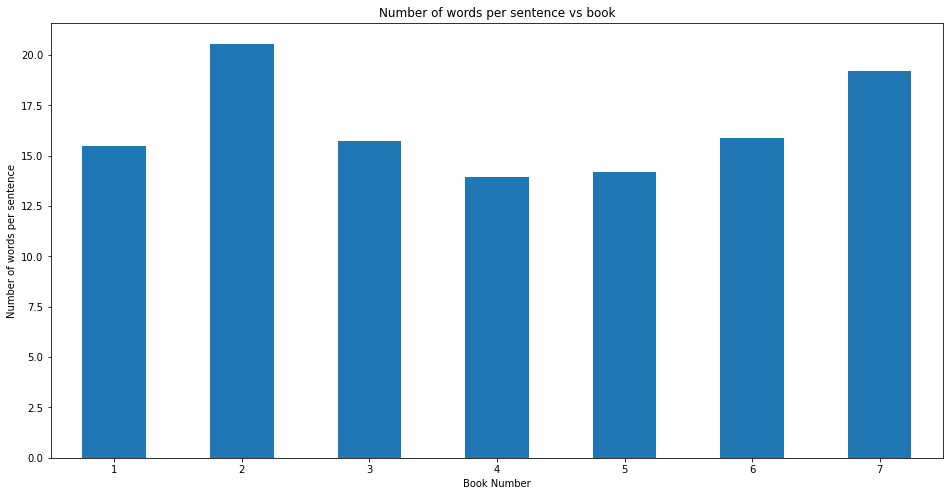

In [64]:
plt.figure(figsize=(16, 8))
ax = df['word_per_sentence'].plot(kind='bar' ,rot=0)
ax.set_title('Number of words per sentence vs book')
ax.set_xlabel('Book Number')
ax.set_ylabel('Number of words per sentence')
ax.set_xticklabels(x_labels)
plt.show()

<details>
    <summary><strong>Click once to see our plot</strong></summary>
    <img src = "https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/WordPerSentenceBarplot.png">
</details>
<br>
<details>
    <summary><strong>What do you notice about the writing length in the series? Click once to find out.</strong></summary>
    <div>With the exception of the second and last book, the word per sentence in all books are written quite consistently, with more or less 14-15 words per sentence.</div>
</details>

### Step 11: Generate Dale-Chall score for the text
Textstat is a handy library that can do that, more information in the documentation <a href="https://github.com/shivam5992/textstat">here</a>.

Let's work with a score named Dale-Chall readibility score. The score is based on a list of 3000 words that fourth-graders commonly understand, and any words not in that list is considered difficult.

Bear in mind a few things:
- the texts are in slightly different formats, and the metrics generated provide only rough estimates of the reability
- the scores typically depend on the difficulty of words, and words that are foreign to the English language, e.g., spells, are foreign and are considered difficult words
- the scores should not be taken on its own, but used to compare between texts instead

We won't spend too much time with generating the metrics, but it's a good practice session for you. 

More readings on Wikipedia: https://en.wikipedia.org/wiki/Dale%E2%80%93Chall_readability_formula

In [ ]:
# Step 11: Generate the Dale-Chall score for the text

In [75]:
textstat.dale_chall_readability_score(df['full_text'][0])

1.49

In [80]:
for index, row in df.iterrows():
    print(textstat.dale_chall_readability_score(df['full_text'][index]))

1.49
2.43
2.01
1.97
2.53
2.22
2.24


<details>
    <summary><strong>What do you observe about the Dale-Chall score of the series? Click once to see what we think</strong></summary>
    <div>The scores should be around 2, making the series are pretty good book for 4th graders and below. That would be around 9-10 years of age. It also seems like Book 5 is relatively the hardest to read as well, based on the scores!/div>
</details>

### Step 12: Count the number of exclamation marks
Characters in the series have a penchant for exclamation, so let's count the number of exclamation marks there are in the series.

![ExclamationCountColumn](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/ExclamationCountColumn.png)

Loop through each text, and in each text count the number of "!".

<details>
    <summary><strong>Click once for hint</strong></summary>
    <div>Google "program to count the total number of punctuation characters exists in a string"</div>
</details>

In [ ]:
# Step 12: Count exclamation markes in texts

In [85]:
sub = "!";
df['exclamation_count']=df['full_text'].str.count(sub)

In [86]:
df

,name,full_text,char_length,word_length,sentence_length,word_per_sentence,exclamation_count
0,Harry Potter and the Sorcerer's Stone,Harry Potter and the Sorcerer's Stone CHAPTER ...,437562,99030,6394,15.487957,474
1,Harry Potter and The Chamber of Secrets,J . K . R O W L ! N G HARRY POTTER /...,507952,112008,5446,20.567022,498
2,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban by ...,615711,135029,8582,15.733978,1012
3,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire By J.K. ...,1113443,243895,17521,13.920153,1391
4,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix J K ...,1524926,322422,22688,14.211125,1562
5,Harry Potter and The Half-Blood Prince,Harry Potter and The Half-Blood Prince Chapte...,991870,217802,13733,15.859754,1066
6,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows By J. K....,1161885,253196,13166,19.231050,1540


### Step 13: Create "sentence_per_exclamation"
As we have seen, ratio is more important than the absolute values. As such, let's create a column called "sentence_per_exclamation", where 

$sentence\_per\_exclamation = sentence\_length \div exclamation\_count$

How does this metric work? The lower the ratio, the more often characters use an exclamation mark in their speech, e.g., for surprise, yelling, etc.

In [ ]:
# Step 13: Create "sentence_per_exclamation"

In [87]:
df['sentence_per_exclamation']=df['sentence_length']/df['exclamation_count']

### Step 14: Plot "sentence_per_exclamation"
Use a barplot to plot the ratio, and see which series exclaims the most.

In [ ]:
# Step 14: Plot sentence_per_exclamation with a barplot

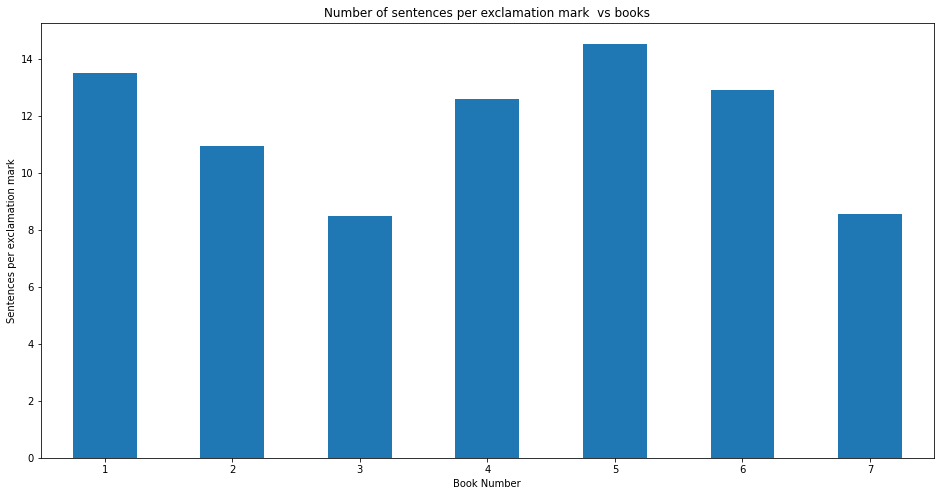

In [88]:
plt.figure(figsize=(16, 8))
ax = df['sentence_per_exclamation'].plot(kind='bar' ,rot=0)
ax.set_title('Number of sentences per exclamation mark  vs books')
ax.set_xlabel('Book Number')
ax.set_ylabel('Sentences per exclamation mark')
ax.set_xticklabels(x_labels)
plt.show()

<details>
    <summary><strong>Click once to see our plot, and hear what we think</strong></summary>
    <img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/SentencePerExclamationBarplot.png">
    <br>
    <div>Looks like there is a lot of yelling in Book 3 and Book 7. Makes sense for Book 7, since the book is the final in the series and contains the climax of the conflict between good and evil.</div>
</details>

### End of Part II
You're done with Part II! To recap, in this part you:
- Generated quantitative metrics for text
- Plotted the metrics for visualization and comparison

In the next Part, you'll perform sentiment analysis on the text in the series.